# K-Prototype Clustering

**Bank Marketing Dataset**<br><br>
Running the K-Prototype clustering.
- Use only the following columns 'job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m' where age, duration and euriborn3m are the numerical columns.
- Convert all categorical columns to numeric by using LabelEncoder()
- Standardize all the columns before using K-Prototype clustering
- Remember that you also need to convert the final dataframe to a matrix for applying K-Prototype.
- First check K-prototype with the number of clusters as 5.
- Please keep in mind that the code may take some time to execute as there are so many categorical variables, so be patient.

In [88]:
# Importing Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kprototypes import KPrototypes

### Read dataset

In [89]:
# Reading Dataset
df_bank = pd.read_csv('../data/bankmarketing.csv', sep=",",engine = 'python')
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [90]:
COLUMNS = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']
df_bank = df_bank[COLUMNS]
print(df_bank.info())
df_bank.head()

COLUMNS_CAT = df_bank.select_dtypes('object').columns.tolist()
COLUMNS_CAT_INDICES = df_bank.columns.get_indexer(df_bank.select_dtypes('object').columns).tolist()
COLUMNS_NUM = df_bank.select_dtypes(['int64','float64']).columns.tolist()
print('COLUMNS_CAT', COLUMNS_CAT, COLUMNS_CAT_INDICES)
print('COLUMNS_NUM', COLUMNS_NUM)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job          41188 non-null  object 
 1   marital      41188 non-null  object 
 2   education    41188 non-null  object 
 3   default      41188 non-null  object 
 4   housing      41188 non-null  object 
 5   loan         41188 non-null  object 
 6   contact      41188 non-null  object 
 7   month        41188 non-null  object 
 8   day_of_week  41188 non-null  object 
 9   poutcome     41188 non-null  object 
 10  age          41188 non-null  int64  
 11  duration     41188 non-null  int64  
 12  euribor3m    41188 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 4.1+ MB
None
COLUMNS_CAT ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
COLUMNS_NUM ['age', 'duration', 'euribor3

### Convert all categorical columns to numeric by using LabelEncoder()

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_bank[COLUMNS_CAT] = df_bank[COLUMNS_CAT].apply(le.fit_transform)
df_bank_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


### Standardize all the columns before using K-Prototype clustering

In [92]:
df_bank['duration'].mean()

258.2850101971448

In [93]:
#COLUMNS_NUM
df_bank[COLUMNS] = df_bank[COLUMNS].apply(lambda x: (x - x.mean()) / np.std(x))

In [94]:
df_bank.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246


In [95]:
df_bank['duration'].mean()

-1.3973478099584373e-17

### Convert the final dataframe to a matrix for applying K-Prototype

In [ ]:
# Converting the dataset into matrix
bank_matrix = df_bank.to_numpy()
bank_matrix

###  Check K-prototype with the number of clusters as 5

In [ ]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(bank_matrix, categorical=COLUMNS_CAT_INDICES)

In [ ]:
kproto.cluster_centroids_

In [ ]:
# Checking the cost of the clusters created.
kproto.cost_

In [ ]:
# Adding the predicted clusters to the main dataset
df_bank['cluster_id'] = clusters

In [ ]:
# Re-check
df_bank.head()

In [ ]:
df_bank['cluster_id'].value_counts()

In [ ]:
# Checking the clusters created
blooddf = pd.DataFrame(blood['cluster_id'].value_counts())
blooddf

In [ ]:
sns.barplot(x=blooddf.index, y=blooddf['cluster_id'])

1 - 219638.5
2 - 179346.93
3 - 157888.3
4 - 140920.34
5 - 128985.39
6 - 122954.79
7 - 117893.48


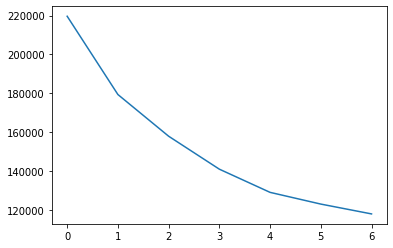

In [96]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(bank_matrix, categorical=COLUMNS_CAT_INDICES)
    print(f"{num_clusters} - {round(kproto.cost_,2)}")
    cost.append(kproto.cost_)
    
plt.plot(cost)